In [16]:
#Social_Network_Ads.csv

**Importing the libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/Social_Network_Ads.csv')

**ENCODING**

In [19]:
df.Gender = df.Gender.map({'Male':1,'Female':0})

**EDA**

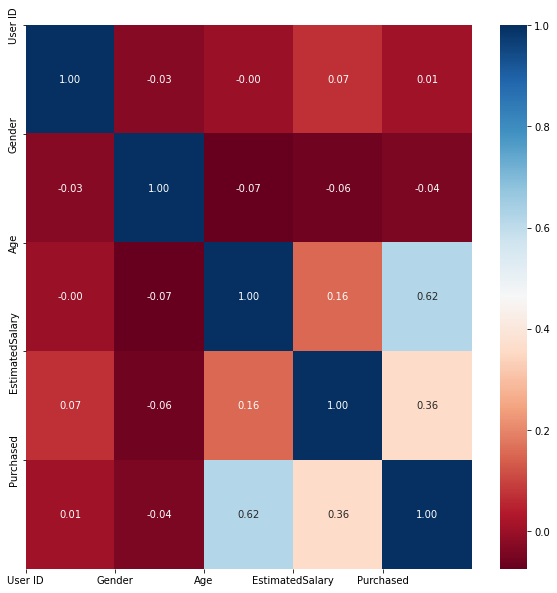

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Dropping Age column as correlation between Age and Purchased represents non-linear relation.

**Splitting the dataset into the Training set and Test set**

In [21]:
X = df[['Age', 'EstimatedSalary']].values
y = df.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

**Feature Scaling**

In [23]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [24]:
from sklearn.tree import DecisionTreeClassifier

levels = [1,2,3,4,5,6,7,8,9,10,15,20,30]
for depth in levels:
  dtc = DecisionTreeClassifier(max_depth=depth,random_state=2)
  dtc.fit(X_train,y_train)
  print('Depth= {}  train-score= {}  test-score= {}'.format(depth,dtc.score(X_train,y_train),dtc.score(X_test,y_test)))

Depth= 1  train-score= 0.8375  test-score= 0.85
Depth= 2  train-score= 0.90625  test-score= 0.9375
Depth= 3  train-score= 0.90625  test-score= 0.8875
Depth= 4  train-score= 0.934375  test-score= 0.9
Depth= 5  train-score= 0.940625  test-score= 0.8875
Depth= 6  train-score= 0.95  test-score= 0.8875
Depth= 7  train-score= 0.9625  test-score= 0.9
Depth= 8  train-score= 0.971875  test-score= 0.8625
Depth= 9  train-score= 0.98125  test-score= 0.875
Depth= 10  train-score= 0.9875  test-score= 0.8625
Depth= 15  train-score= 1.0  test-score= 0.8625
Depth= 20  train-score= 1.0  test-score= 0.8625
Depth= 30  train-score= 1.0  test-score= 0.8625


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2,random_state=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

[Text(0.5, 0.8333333333333334, 'X[0] <= 42.5\ngini = 0.453\nsamples = 320\nvalue = [209, 111]'),
 Text(0.25, 0.5, 'X[1] <= 89500.0\ngini = 0.265\nsamples = 229\nvalue = [193, 36]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.07\nsamples = 193\nvalue = [186, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.313\nsamples = 36\nvalue = [7, 29]'),
 Text(0.75, 0.5, 'X[0] <= 46.5\ngini = 0.29\nsamples = 91\nvalue = [16, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.231\nsamples = 75\nvalue = [10, 65]')]

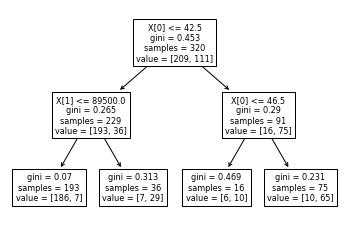

In [26]:
from sklearn.tree import plot_tree
plot_tree(dtc)

**Predicting the Test set results**

In [27]:
y_pred = dtc.predict(X_test)

**Making the Confusion Matrix**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.89      0.97      0.93        32

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
[[44  4]
 [ 1 31]]


**Visualising the Training set results**

0.8739495798319327


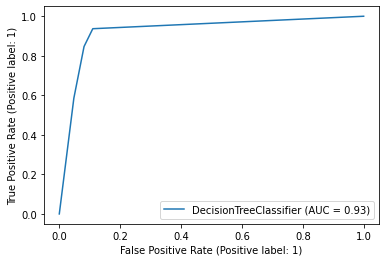

In [29]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

y_train_pred = dtc.predict(X_train)
print(f1_score(y_train,dtc.predict(X_train)))
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=2)
plot_roc_curve(dtc, X_train, y_train) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)

**Visualising the Test set results**

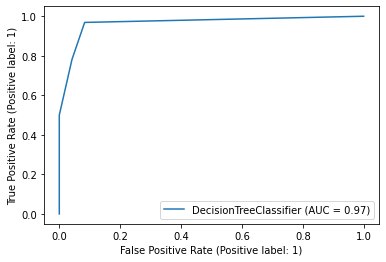

In [30]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#confusion_matrix(y_test,y_test_predictions)
f1_score(y_test,dtc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plot_roc_curve(dtc, X_test, y_test) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)